## Cross-cancer prediction analysis

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

In [2]:
cross_cancer_dir = os.path.join(cfg.results_dir, 'cross_cancer', 'cross_cancer')
cross_cancer_df = au.load_prediction_results_cc(cross_cancer_dir, 'cross_cancer')
print(cross_cancer_df.shape)
cross_cancer_df.head()

(3456, 8)


,auroc,aupr,train_identifier,test_identifier,signal,seed,data_type,experiment
0,0.92601,0.555590,NRAS_COAD,PTEN_SKCM,shuffled,42,train,cross_cancer
1,0.50530,0.092270,NRAS_COAD,PTEN_SKCM,shuffled,42,test,cross_cancer
2,0.48782,0.061438,NRAS_COAD,PTEN_SKCM,shuffled,42,cv,cross_cancer
0,0.53141,0.063640,NF1_LGG,TTN_GBM,shuffled,42,train,cross_cancer
1,0.54635,0.332380,NF1_LGG,TTN_GBM,shuffled,42,test,cross_cancer


In [3]:
# get rows that have the same identifier
cross_cancer_df['train_test_equal'] = (cross_cancer_df.train_identifier ==
                                       cross_cancer_df.test_identifier)
# get rows that have the same gene (possibly different identifiers)
cross_cancer_df['gene_equal'] = (cross_cancer_df.train_identifier.str.split('_', expand=True)[0] ==
                                 cross_cancer_df.test_identifier.str.split('_', expand=True)[0])

Text(0.5, 1.0, 'Cross-cancer performance, same train/test gene highlighted')

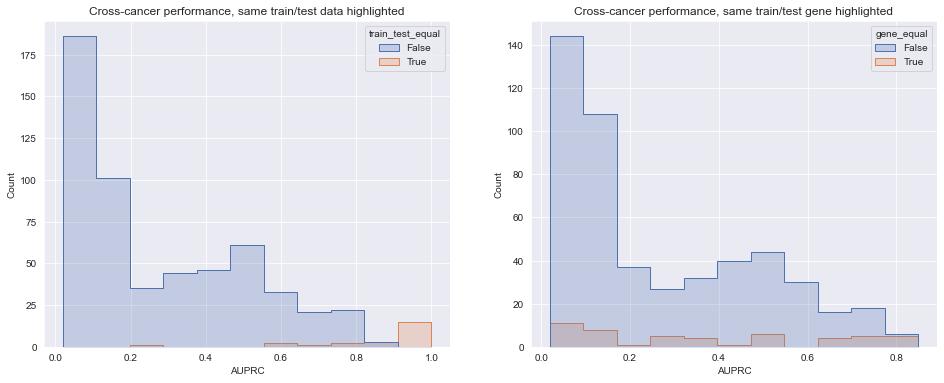

In [4]:
sns.set({'figure.figsize': (16, 6)})
fig, axarr = plt.subplots(1, 2)

sns.histplot(data=cross_cancer_df[(cross_cancer_df.signal == 'signal') &
                                  (cross_cancer_df.data_type == 'test')],
             x='aupr', stat='count', hue='train_test_equal', element='step',
             kde=False, ax=axarr[0])
axarr[0].set_xlabel('AUPRC')
axarr[0].set_ylabel('Count')
axarr[0].set_title('Cross-cancer performance, same train/test data highlighted')
sns.histplot(data=cross_cancer_df[(cross_cancer_df.signal == 'signal') &
                                  (cross_cancer_df.data_type == 'test') &
                                  (~cross_cancer_df.train_test_equal)],
             x='aupr', stat='count', hue='gene_equal', element='step',
             kde=False, ax=axarr[1])
axarr[1].set_xlabel('AUPRC')
axarr[1].set_ylabel('Count')
axarr[1].set_title('Cross-cancer performance, same train/test gene highlighted')

In [5]:
count_unique_ids = np.unique(cross_cancer_df.train_identifier).shape[0]
print(count_unique_ids)

24


In [6]:
heatmap_df, sorted_ids = au.heatmap_from_results(cross_cancer_df, normalize_control=True)
heatmap_df.iloc[:5, :5]

(576, 3)
(576, 3)


test_identifier,KRAS_COAD,NRAS_COAD,NRAS_SKCM,NRAS_THCA,BRAF_THCA
train_identifier,,,,,
KRAS_COAD,0.47312,-0.022351,0.03504,-0.037884,0.10741
NRAS_COAD,0.07824,0.637576,-0.01529,-0.038908,0.00104
NRAS_SKCM,-0.06536,0.034845,0.69712,-0.016974,0.04207
NRAS_THCA,-0.06076,0.000753,-0.02570,0.724750,-0.20010
BRAF_THCA,-0.02374,-0.005565,0.00371,-0.048463,0.40115


Text(88.0, 0.5, 'Train identifier')

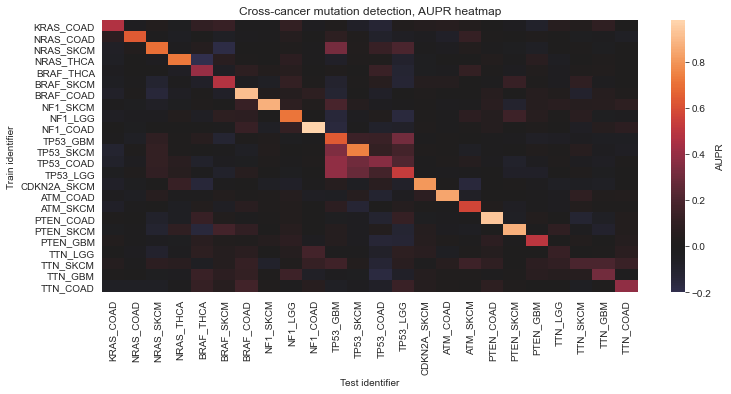

In [7]:
sns.set({'figure.figsize': (12, 5)})
sns.heatmap(heatmap_df, cbar_kws={'label': 'AUPR'}, center=0)
plt.title('Cross-cancer mutation detection, AUPR heatmap')
plt.xlabel('Test identifier')
plt.ylabel('Train identifier')

In [17]:
pan_cross_cancer_dir = os.path.join(cfg.results_dir, 'pan_cross_cancer', 'pan_cross_cancer')
# pan_cross_cancer_dir = os.path.join('/home/jake/data/pancancer_cross_cancer_10_22/pan_cross_cancer_medmut/pan_cross_cancer')
pan_cross_cancer_df = au.load_prediction_results_cc(pan_cross_cancer_dir, 'pan_cross_cancer')
print(pan_cross_cancer_df.shape)
pan_cross_cancer_df.head()

(1584, 8)


,auroc,aupr,train_gene,test_identifier,signal,seed,data_type,experiment
0,0.91543,0.530930,RB1,KRAS_COAD,shuffled,42,train,pan_cross_cancer
1,0.49109,0.463860,RB1,KRAS_COAD,shuffled,42,test,pan_cross_cancer
2,0.48823,0.077754,RB1,KRAS_COAD,shuffled,42,cv,pan_cross_cancer
0,0.81182,0.348820,NF1,ATM_COAD,signal,42,train,pan_cross_cancer
1,0.47958,0.069659,NF1,ATM_COAD,signal,42,test,pan_cross_cancer


Text(0.5, 1.0, 'Train pancancer/test cross-cancer, same train/test gene highlighted')

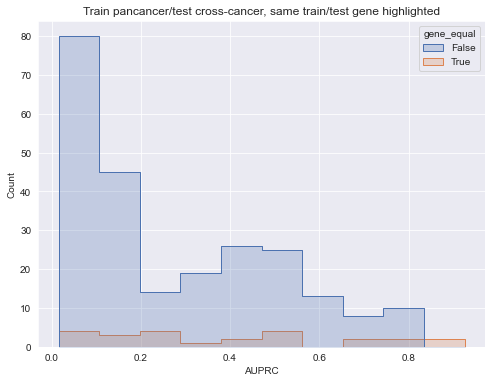

In [18]:
pan_cross_cancer_df['gene_equal'] = (pan_cross_cancer_df.train_gene ==
                                     pan_cross_cancer_df.test_identifier.str.split('_', expand=True)[0])

sns.set({'figure.figsize': (8, 6)})
sns.histplot(data=pan_cross_cancer_df[(pan_cross_cancer_df.signal == 'signal') &
                                      (pan_cross_cancer_df.data_type == 'test')],
             x='aupr', stat='count', hue='gene_equal', element='step', kde=False)
plt.xlabel('AUPRC')
plt.ylabel('Count')
plt.title('Train pancancer/test cross-cancer, same train/test gene highlighted')

In [19]:
# filter cross-cancer data and make a deep copy
# (this avoids SettingWithCopyError)
heatmap_df, _ = au.heatmap_from_results(pan_cross_cancer_df,
                                        train_pancancer=True,
                                        normalize_control=True,
                                        sorted_ids=sorted_ids)
heatmap_df.iloc[:5, :5]

(264, 3)
(264, 3)


test_identifier,KRAS_COAD,NRAS_COAD,NRAS_SKCM,NRAS_THCA,BRAF_THCA
train_gene,,,,,
KRAS,0.22955,0.038381,-0.00629,-0.031595,0.22804
HRAS,0.10839,-0.028282,-0.02557,-0.022721,-0.00372
NRAS,-0.05720,0.027781,0.07563,0.070457,-0.04817
BRAF,-0.05191,-0.007373,-0.00278,0.031857,-0.14305
NF1,0.01747,-0.032609,-0.02108,-0.021640,0.01954


Text(88.0, 0.5, 'Train identifier')

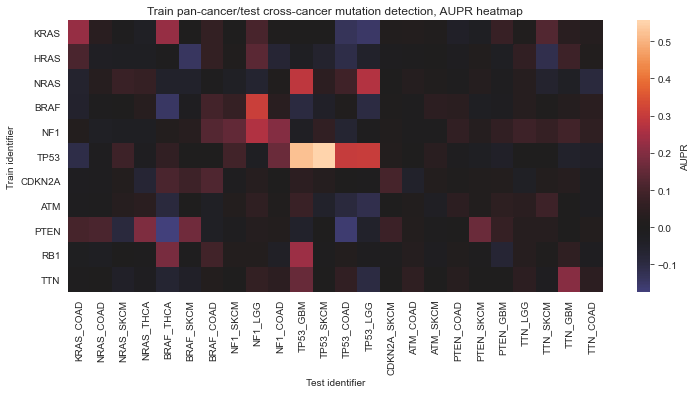

In [20]:
sns.set({'figure.figsize': (12, 5)})
sns.heatmap(heatmap_df, cbar_kws={'label': 'AUPR'}, center=0)
plt.title('Train pan-cancer/test cross-cancer mutation detection, AUPR heatmap')
plt.xlabel('Test identifier')
plt.ylabel('Train identifier')